# 1. 데이터 살펴보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [4]:
train.tail()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0
1954,1955,22.0,Company Invited,1,9.0,Salaried,Male,2,4.0,Basic,3.0,Divorced,1.0,1,3,0,0.0,Executive,17853.0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

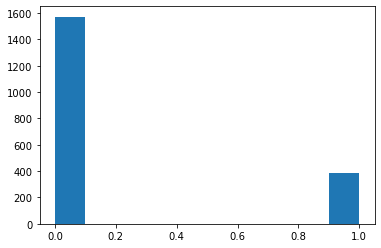

In [5]:
plt.hist(train.ProdTaken)
plt.show()

# 2. 데이터 전처리

### 1) 결측치 처리

In [7]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [11]:
def handle_na(data):
    temp = data.copy()
    for col, dtype in temp.dtypes.items():
        if dtype == 'object':
            value = 'Unknown'
        elif dtype == 'int64' or dtype == 'float64':
            value = 0
        temp.loc[:, col] = temp[col].fillna(value)
    return temp

train_nona = handle_na(train)

train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

### 2) 문자형 변수 전처리

In [12]:
object_columns = train_nona.columns[train_nona.dtypes == 'object']
print(f'object 칼럼은 다음과 같습니다 : {list(object_columns)}')

object 칼럼은 다음과 같습니다 : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [15]:
object_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [14]:
train_nona[object_columns]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [19]:
from sklearn.preprocessing import LabelEncoder

train_enc = train_nona.copy()

for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


### 3) test 전처리

In [21]:
test = handle_na(test)

for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_nona[o_col])
    test[o_col] = encoder.transform(test[o_col])

test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


# 3. Modeling

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [23]:
train = train_enc.drop(columns=['id'])
test = test.drop(columns=['id'])

x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [24]:
model.fit(x_train, y_train)

C:\Users\sun\anaconda3\envs\study\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
prediction = model.predict(test)
print('------------------예측된 데이터의 상위 10개의 값 확인---------------------\n')
print(prediction[:10])

------------------예측된 데이터의 상위 10개의 값 확인---------------------

[0 0 0 0 1 0 0 0 0 0]


In [28]:
sample['ProdTaken'] = prediction

In [29]:
sample

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [30]:
sample.to_csv('baseline.csv', index=False)